# Introduction

As one of Canada's biggest and bustling cities, Toronto is also subject to countless crimes. Assaults is just one of type of crime that is extremely prevalent in and around the city, and can happen to anyone. The goal of this EDA is to explore some trends in assaults in the city, and to determine which parts of the city are the most unsafe and for whom. 

The data is pulled from Toronto Police Service's Public Safety Data Portal and can be found at the following link:
http://data.torontopolice.on.ca/datasets/025dea0af035479ab43d7780e12dc395_0

### Import Required Libraries and Data + Set Colour Palette

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pt
import missingno as mso
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('Data/Toronto_Assault_Data.csv')

Set the colour palette:

['#8bdab2', '#40b7ad', '#348fa7', '#37659e', '#413d7b', '#2e1e3b']


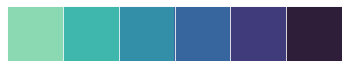

In [3]:
sns.set_style('darkgrid')
pal_name = 'mako_r'
sns.set_palette(pal_name)
cmap = sns.cm.mako_r
sns.palplot(sns.color_palette(pal_name))
pal = sns.color_palette(pal_name).as_hex()
print(pal)

### Understanding the Data

In [4]:
df.columns

Index(['X', 'Y', 'Index_', 'event_unique_id', 'occurrencedate', 'reporteddate',
       'premisetype', 'ucr_code', 'ucr_ext', 'offence', 'reportedyear',
       'reportedmonth', 'reportedday', 'reporteddayofyear',
       'reporteddayofweek', 'reportedhour', 'occurrenceyear',
       'occurrencemonth', 'occurrenceday', 'occurrencedayofyear',
       'occurrencedayofweek', 'occurrencehour', 'MCI', 'Division', 'Hood_ID',
       'Neighbourhood', 'Lat', 'Long', 'ObjectId'],
      dtype='object')

In [5]:
df.dtypes

X                      float64
Y                      float64
Index_                   int64
event_unique_id         object
occurrencedate          object
reporteddate            object
premisetype             object
ucr_code                 int64
ucr_ext                  int64
offence                 object
reportedyear             int64
reportedmonth           object
reportedday              int64
reporteddayofyear        int64
reporteddayofweek       object
reportedhour             int64
occurrenceyear         float64
occurrencemonth         object
occurrenceday          float64
occurrencedayofyear    float64
occurrencedayofweek     object
occurrencehour           int64
MCI                     object
Division                object
Hood_ID                  int64
Neighbourhood           object
Lat                    float64
Long                   float64
ObjectId                 int64
dtype: object

In [6]:
df.sample()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId
83492,-79.273613,43.685944,147451,GO-2017350398,2017-02-25T09:58:00.000Z,2017-02-25T09:58:00.000Z,House,1430,100,Assault,...,56.0,Saturday,9,Assault,D41,122,Birchcliffe-Cliffside (122),43.685944,-79.273613,82493


It seems X and Y are redundant and represent the latitude and longitude, so this will be dropped. Similarly, ucr_code and ucr_ext because it is not clear what data they represent. There is overlap for reporteddate, and the data in reportedyear, reportedmonth, reportedday, reporteddayofyear, reporteddayofweek and reportedhour. All these columns will be kept for now since it might be useful for visualization purposes. Similar with the columns associated with occurencedate. 

The rest of the data will stay intact for now. 

In [7]:
df.drop(columns=['X', 'Y', 'ucr_code', 'ucr_ext'])

,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId
0,6464,GO-201514451,2015-01-03T17:10:00.000Z,2015-01-03T17:21:00.000Z,Outside,Assault,2015,January,3,3,...,3.0,Saturday,17,Assault,D31,27,York University Heights (27),43.767315,-79.500069,3001
1,6465,GO-2015117327,2015-01-20T21:00:00.000Z,2015-01-20T21:03:00.000Z,Apartment,Assault,2015,January,20,20,...,20.0,Tuesday,21,Assault,D11,90,Junction Area (90),43.665565,-79.478958,3002
2,5782,GO-2015878449,2015-05-26T13:30:00.000Z,2015-05-27T07:52:00.000Z,Outside,Assault,2015,May,27,147,...,146.0,Tuesday,13,Assault,D32,31,Yorkdale-Glen Park (31),43.724880,-79.448265,3003
3,6466,GO-20151355915,2015-08-08T02:12:00.000Z,2015-08-08T02:12:00.000Z,Outside,Assault,2015,August,8,220,...,220.0,Saturday,2,Assault,D32,38,Lansing-Westgate (38),43.760361,-79.412476,3004
4,6467,GO-20151355915,2015-08-08T02:12:00.000Z,2015-08-08T02:12:00.000Z,Outside,Assault,2015,August,8,220,...,220.0,Saturday,2,Assault,D32,38,Lansing-Westgate (38),43.760361,-79.412476,3005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90873,160603,GO-20181986993,2018-10-28T01:43:00.000Z,2018-10-28T01:43:00.000Z,House,Assault,2018,October,28,301,...,301.0,Sunday,1,Assault,D33,40,St.Andrew-Windfields (40),43.758224,-79.386162,90874
90874,160604,GO-20181898267,2018-10-14T13:00:00.000Z,2018-10-14T13:10:00.000Z,Apartment,Assault With Weapon,2018,October,14,287,...,287.0,Sunday,13,Assault,D54,44,Flemingdon Park (44),43.716579,-79.330376,90875
90875,160605,GO-20181898267,2018-10-14T13:00:00.000Z,2018-10-14T13:10:00.000Z,Apartment,Assault With Weapon,2018,October,14,287,...,287.0,Sunday,13,Assault,D54,44,Flemingdon Park (44),43.716579,-79.330376,90876
90876,160606,GO-20181898267,2018-10-14T13:00:00.000Z,2018-10-14T13:10:00.000Z,Apartment,Assault,2018,October,14,287,...,287.0,Sunday,13,Assault,D54,44,Flemingdon Park (44),43.716579,-79.330376,90877


In [8]:
df.describe() #only for non-missing values

,X,Y,Index_,ucr_code,ucr_ext,reportedyear,reportedday,reporteddayofyear,reportedhour,occurrenceyear,occurrenceday,occurrencedayofyear,occurrencehour,Hood_ID,Lat,Long,ObjectId
count,90878.000000,90878.000000,90878.000000,90878.000000,90878.000000,90878.000000,90878.000000,90878.000000,90878.000000,90837.000000,90837.000000,90837.000000,90878.000000,90878.000000,90878.000000,90878.000000,90878.000000
mean,-79.388685,43.705310,83006.304199,1430.446720,100.768173,2016.075783,15.740102,185.935716,13.026805,2016.024560,15.425091,184.819149,12.606516,74.908658,43.705310,-79.388685,45439.500000
std,0.103499,0.052434,45469.072858,11.580969,3.073166,1.403917,8.845155,103.125331,6.875401,1.486979,9.013225,103.575740,7.179195,40.045789,0.052434,0.103499,26234.363219
min,-79.635239,43.587093,0.000000,1410.000000,100.000000,2014.000000,1.000000,1.000000,0.000000,2000.000000,1.000000,1.000000,0.000000,1.000000,43.587093,-79.635239,1.000000
25%,-79.461098,43.659100,46396.500000,1430.000000,100.000000,2015.000000,8.000000,100.000000,8.000000,2015.000000,8.000000,99.000000,7.000000,42.000000,43.659100,-79.461098,22720.250000
50%,-79.388405,43.698345,83300.000000,1430.000000,100.000000,2016.000000,16.000000,186.000000,14.000000,2016.000000,15.000000,185.000000,14.000000,76.000000,43.698345,-79.388405,45439.500000
75%,-79.312859,43.750961,121641.750000,1430.000000,100.000000,2017.000000,23.000000,274.000000,19.000000,2017.000000,23.000000,274.000000,19.000000,111.000000,43.750961,-79.312859,68158.750000
max,-79.123100,43.847954,162167.000000,1480.000000,150.000000,2018.000000,31.000000,366.000000,23.000000,2018.000000,31.000000,366.000000,23.000000,140.000000,43.847954,-79.123100,90878.000000


In [9]:
len(df)

90878

In [10]:
df.isnull().sum()

X                       0
Y                       0
Index_                  0
event_unique_id         0
occurrencedate          0
reporteddate            0
premisetype             0
ucr_code                0
ucr_ext                 0
offence                 0
reportedyear            0
reportedmonth           0
reportedday             0
reporteddayofyear       0
reporteddayofweek       0
reportedhour            0
occurrenceyear         41
occurrencemonth        41
occurrenceday          41
occurrencedayofyear    41
occurrencedayofweek    41
occurrencehour          0
MCI                     0
Division                0
Hood_ID                 0
Neighbourhood           0
Lat                     0
Long                    0
ObjectId                0
dtype: int64

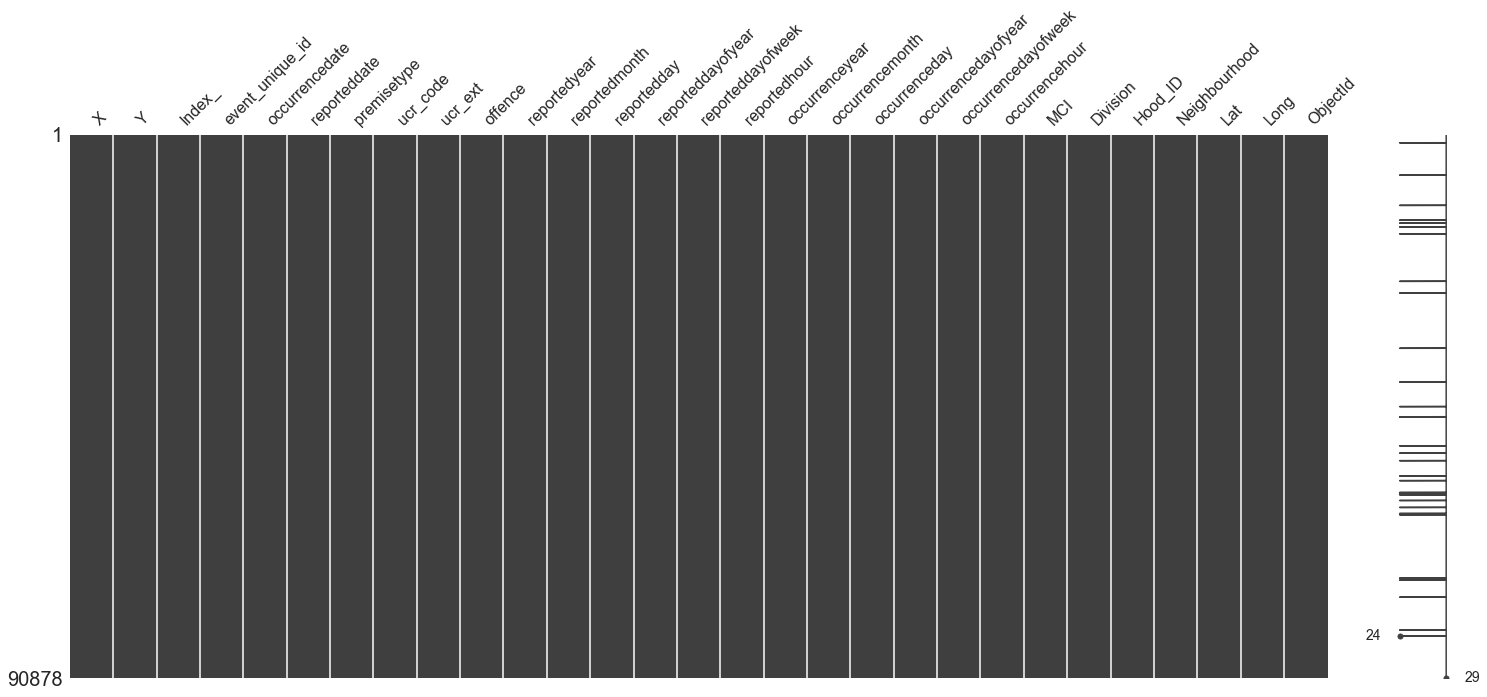

In [11]:
mso.matrix(df)

There are 41 entries that are missing occurenceyear, occurencemonth, occurenceday, occurrencedayofyear, and occurrencedayofweek. This information can be easily found using standard pandas timedate methods. Instead, if these entries are not important, they can be deleted.

First convert the reportdate and occurrence date columns to timedate objects:

In [12]:
df.occurrencedate = pd.to_datetime(df.occurrencedate)
df.reporteddate = pd.to_datetime(df.reporteddate)
print(df.occurrencedate.head())
print(df.reporteddate.head())

0   2015-01-03 17:10:00+00:00
1   2015-01-20 21:00:00+00:00
2   2015-05-26 13:30:00+00:00
3   2015-08-08 02:12:00+00:00
4   2015-08-08 02:12:00+00:00
Name: occurrencedate, dtype: datetime64[ns, UTC]
0   2015-01-03 17:21:00+00:00
1   2015-01-20 21:03:00+00:00
2   2015-05-27 07:52:00+00:00
3   2015-08-08 02:12:00+00:00
4   2015-08-08 02:12:00+00:00
Name: reporteddate, dtype: datetime64[ns, UTC]


Check the date range of the missing entries:

In [13]:
print('The earliest missing entry is from:', df.loc[df.occurrenceyear.isnull()].occurrencedate.min())
print('The more recent missing entry is from:', df.loc[df.occurrenceyear.isnull()].occurrencedate.max())

The earliest missing entry is from: 1966-06-09 00:00:00+00:00
The more recent missing entry is from: 1999-10-01 12:00:00+00:00


Since these assaults occurred way before 2014 and were recorded after 2014, they will be excluded for now. Note that it is the assumption that all 41 missing values for each column correspond to the same rows.

In [14]:
df.dropna(inplace=True)

In [15]:
df.occurrenceyear = df.occurrenceyear.astype(int)

### Visualize the Data

How long does it take for someone to report an assault after it has occurred?

(735227.0166666667, 737066.9972222223)

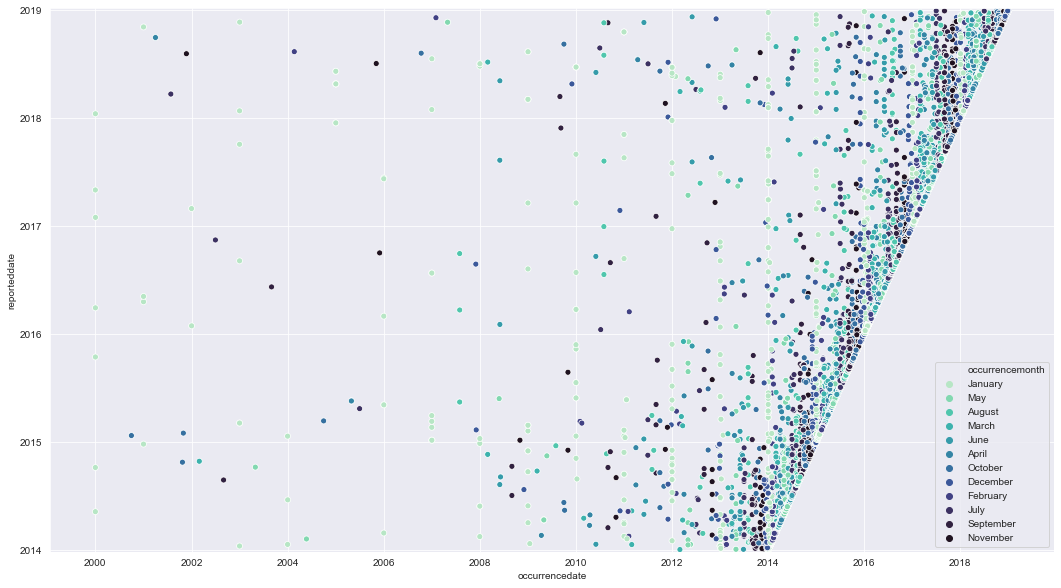

In [16]:
pt.figure(figsize=(18,10))
sns.scatterplot(x='occurrencedate', y='reporteddate', hue='occurrencemonth', data=df, palette=pal_name)
pt.ylim(df.reporteddate.min()-pd.Timedelta(7, unit='D'), df.reporteddate.max()+pd.Timedelta(7, unit='D'))

Ideally, a 1 to 1 line would indicate that reports are filed soon after the occurrence of an assault. Most cases are reported close to when they occurr, as shown by the aggregation of several date points close to 1 to 1 line. For assaults that occurred 2000 onwards and were reported at least 14 years later, it seems that these assaults often occurred in January.

Which neighbourhoods had the most crimes reported?

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140]),
 <a list of 141 Text xticklabel objects>)

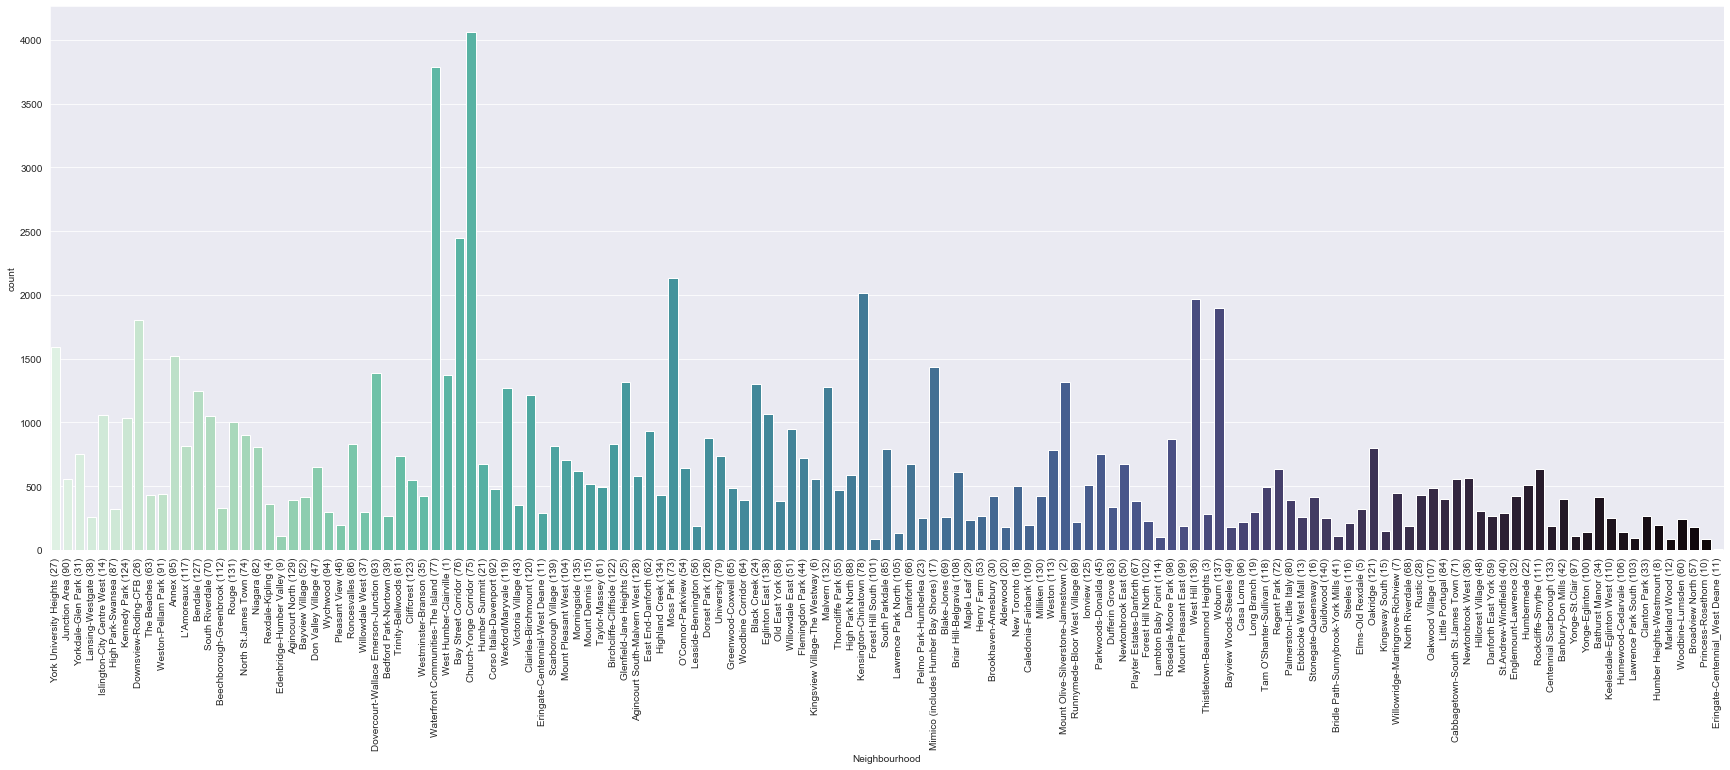

In [17]:
pt.figure(figsize=(30,10))
sns.countplot(x='Neighbourhood', data=df, palette=pal_name)
pt.xticks(rotation=90)

Since this is data from all years aggregated, it is hard to see any regional change throughout the years. Some neighbourhoods clearly stand out. They are:

(77) Waterfront Communities-The Island <br>
(75) Church-Yonge Corridor 

How have these neighbourhoods changed from 2014 to 2018? 

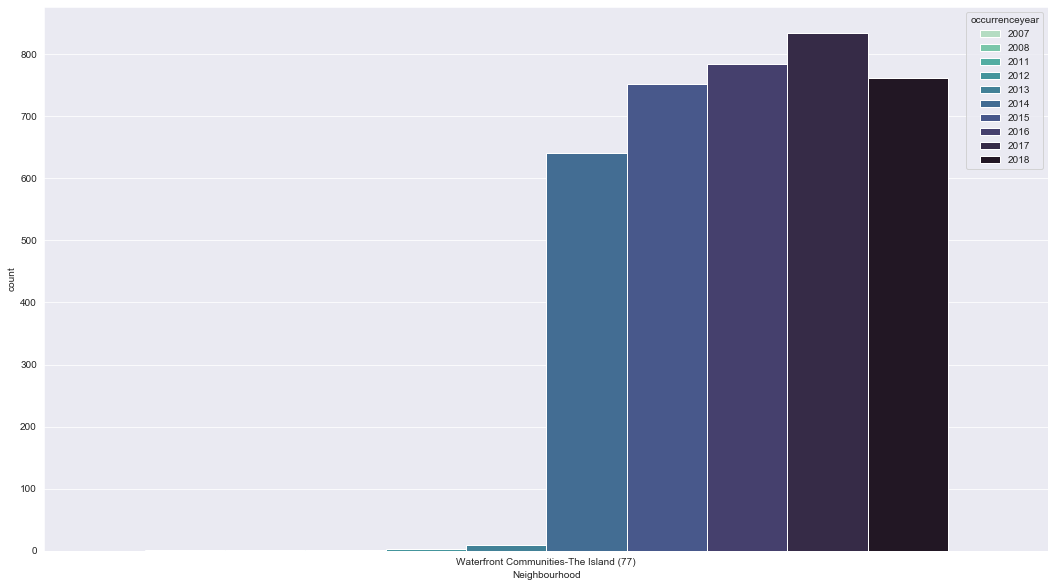

In [18]:
pt.figure(figsize=(18,10))
sns.countplot(x='Neighbourhood', 
              data=df.loc[(df.Hood_ID == 77)],
              hue='occurrenceyear',palette=pal_name)

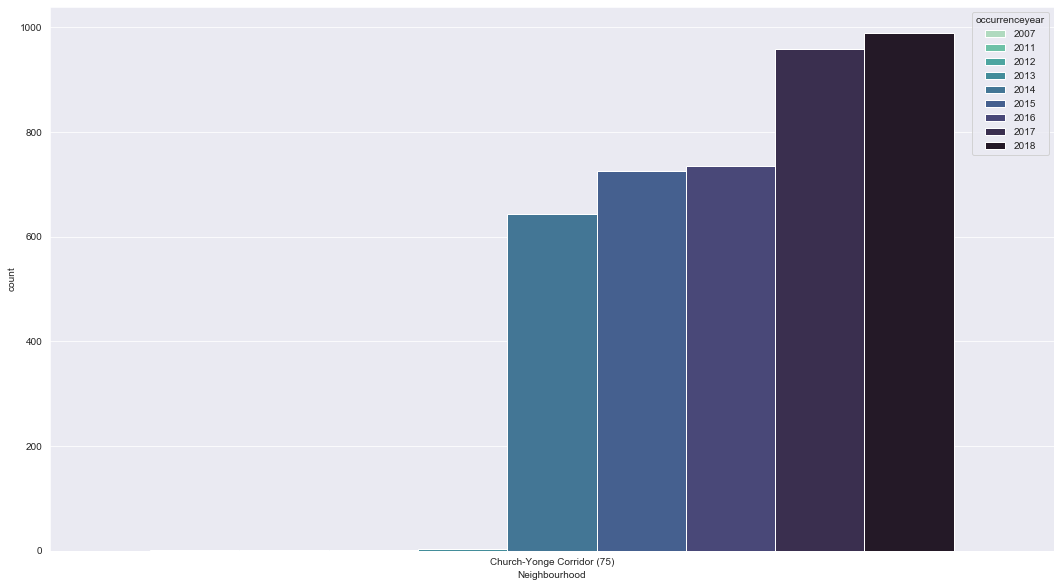

In [19]:
pt.figure(figsize=(18,10))
sns.countplot(x='Neighbourhood', 
              data=df.loc[(df.Hood_ID == 75)],
              hue='occurrenceyear',palette=pal_name)

When are crimes reported the most?

In [20]:
crime_time = pd.DataFrame(df.groupby(['reporteddayofyear', 'reportedyear']).size()).reset_index()
crime_time.columns = ['year_day', 'year', 'count']

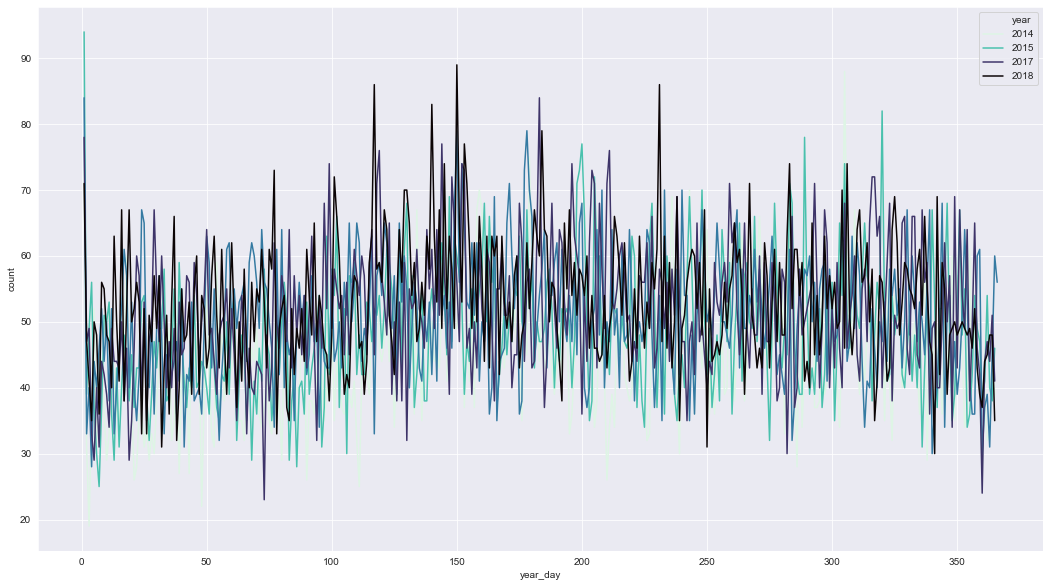

In [21]:
pt.figure(figsize=(18,10))
sns.lineplot(x='year_day', y='count', hue='year', data=crime_time, palette=pal_name)

The above graph is pretty messy. There are some outliers with respect to low or high number of reports, but generally, there is not much of an observable trend. The exception to this is that there is a slight increase in number of reports near the 125th day of the year i.e. May 5th.

What days in the month are most reports filed?

In [34]:
crime_time2 = pd.DataFrame(df.groupby(['reportedmonth', 'reportedday']).size()).reset_index()
crime_time2.columns = ['month', 'day', 'count']
crime_time2 = crime_time2.pivot(index='month', columns='day', values='count')
crime_time2.fillna(0, inplace=True)

crime_time2

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
April,240.0,239.0,244.0,204.0,247.0,214.0,229.0,243.0,249.0,249.0,...,240.0,232.0,236.0,271.0,260.0,297.0,298.0,289.0,268.0,0.0
August,256.0,261.0,283.0,265.0,256.0,252.0,232.0,229.0,263.0,235.0,...,257.0,256.0,255.0,251.0,255.0,231.0,254.0,237.0,235.0,293.0
December,242.0,245.0,279.0,263.0,203.0,240.0,223.0,245.0,247.0,231.0,...,215.0,280.0,242.0,198.0,163.0,208.0,209.0,210.0,241.0,217.0
February,233.0,232.0,220.0,211.0,212.0,249.0,194.0,220.0,245.0,205.0,...,236.0,228.0,202.0,243.0,226.0,248.0,236.0,49.0,0.0,0.0
January,400.0,197.0,198.0,190.0,212.0,190.0,183.0,233.0,228.0,216.0,...,222.0,231.0,227.0,255.0,182.0,199.0,219.0,237.0,234.0,253.0
July,281.0,293.0,297.0,236.0,263.0,263.0,278.0,248.0,237.0,262.0,...,240.0,267.0,287.0,235.0,293.0,232.0,242.0,236.0,265.0,245.0
June,297.0,279.0,268.0,258.0,242.0,258.0,252.0,303.0,282.0,267.0,...,269.0,242.0,260.0,268.0,275.0,300.0,303.0,263.0,248.0,0.0
March,263.0,243.0,197.0,225.0,234.0,228.0,212.0,231.0,231.0,227.0,...,259.0,223.0,215.0,211.0,230.0,221.0,229.0,241.0,223.0,228.0
May,281.0,276.0,268.0,249.0,212.0,245.0,280.0,248.0,295.0,257.0,...,287.0,266.0,294.0,301.0,243.0,268.0,305.0,305.0,310.0,298.0


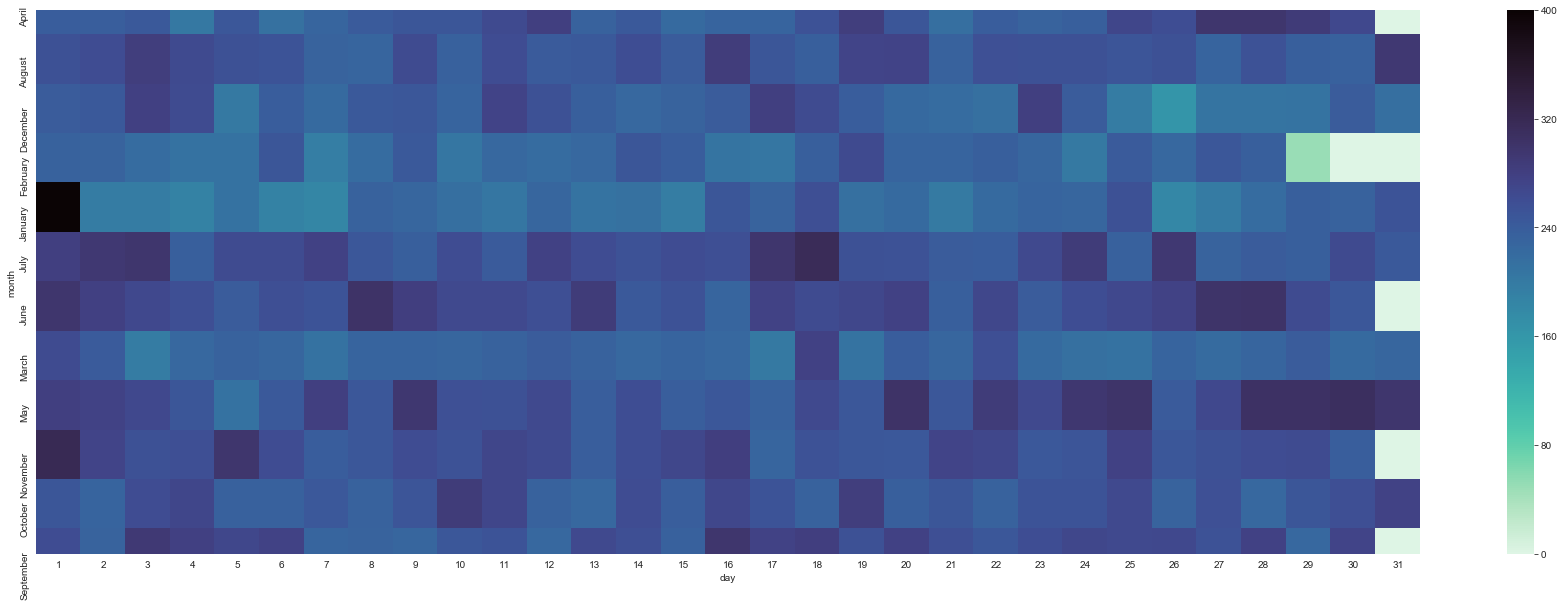

In [35]:
pt.figure(figsize=(31,10))
sns.heatmap(crime_time2, cmap=cmap)

It seems that January 1st has an abormally larger number of reported crimes. It could be NYE having an effect. The second half of May also has significantly higher number of reports. 

Which types of reported assaults are the most common?

In [41]:
crime_type = pd.DataFrame(df.groupby(['offence', 'reportedyear']).size()).reset_index()
crime_type.columns = ['offence', 'year', 'count']
crime_type.sort_values(by=['count'])
crime_type

,offence,year,count
0,Administering Noxious Thing,2014,29
1,Administering Noxious Thing,2015,52
2,Administering Noxious Thing,2016,54
3,Administering Noxious Thing,2017,48
4,Administering Noxious Thing,2018,50
...,...,...,...
91,Use Firearm / Immit Commit Off,2014,16
92,Use Firearm / Immit Commit Off,2015,21
93,Use Firearm / Immit Commit Off,2016,19
94,Use Firearm / Immit Commit Off,2017,26


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

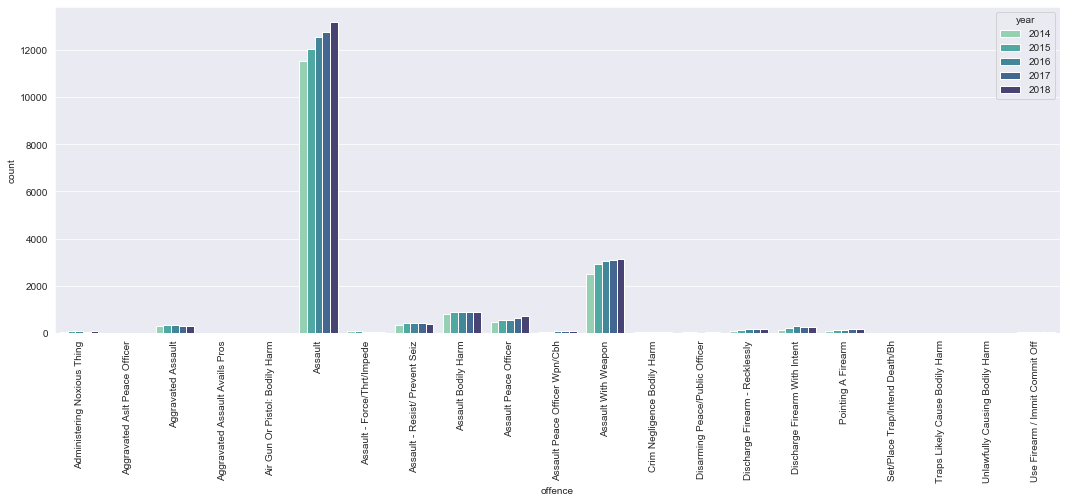

In [46]:
pt.figure(figsize=(18,6))
sns.barplot(x='offence', y='count', hue='year', data=crime_type)
pt.xticks(rotation=90)

As expected, the number of assault and assault with weapons reports are incredibly high. For majority of the offence types, the number of reports is increasing over the years implying a bigger notion of reporting crimes and/or higher crime rates.


The next step is to see if the number of assaults in a particular neighbourhood can be predicted based on the month and day. Since only 4 years of data are available, it will be very limited.